<a href="https://colab.research.google.com/github/aki05162525/gci_compe2/blob/main/compe2_ver1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ライブラリの読み込み
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Google Colaboratoryで作業する場合はこちらも実行してください。
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# %cd 以降にこのnotebookを置いているディレクトリを指定してください。
%cd "/content/drive/MyDrive/GCI　Winter/compe2"

/content/drive/MyDrive/GCI　Winter/compe2


In [ ]:
# データの読み込み
# INPUT_DIRにtrain.csvなどのデータを置いているディレクトリを指定してください。
INPUT_DIR = "./input/"

train = pd.read_csv(INPUT_DIR + "train.csv")
test = pd.read_csv(INPUT_DIR + "test.csv")
sample_sub = pd.read_csv(INPUT_DIR + "sample_submission.csv")

In [ ]:
# trainデータの確認
print(f"train shape: {train.shape}")
train.head(10)

train shape: (171202, 51)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,0,0,Cash loans,F,N,N,0,112500.0,755190.0,36328.5,...,NaN,0.0,0.0,0.0,0.0,-292.0,NaN,NaN,NaN,NaN
1,1,0,Cash loans,F,N,Y,0,225000.0,585000.0,16893.0,...,0.553165,0.0,0.0,0.0,0.0,-617.0,0.0,0.0,0.0,1.0
2,2,0,Cash loans,F,N,Y,0,54000.0,334152.0,18256.5,...,NaN,4.0,0.0,4.0,0.0,-542.0,NaN,NaN,NaN,NaN
3,3,0,Cash loans,F,N,Y,0,67500.0,152820.0,8901.0,...,0.767523,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,1,Cash loans,M,N,N,0,157500.0,271066.5,21546.0,...,0.669057,0.0,0.0,0.0,0.0,-1243.0,0.0,0.0,0.0,4.0
5,5,1,Cash loans,F,N,Y,0,135000.0,247500.0,19971.0,...,NaN,0.0,0.0,0.0,0.0,-307.0,NaN,NaN,NaN,NaN
6,6,0,Cash loans,F,N,Y,0,189000.0,332946.0,17127.0,...,0.399676,6.0,0.0,6.0,0.0,-1918.0,0.0,0.0,0.0,3.0
7,7,1,Cash loans,M,N,Y,0,157500.0,203760.0,24309.0,...,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
8,8,0,Cash loans,M,Y,N,1,324000.0,808650.0,22234.5,...,0.629674,1.0,0.0,1.0,0.0,-1.0,0.0,0.0,0.0,0.0
9,9,1,Cash loans,F,N,Y,1,180000.0,207117.0,16492.5,...,NaN,1.0,0.0,1.0,0.0,-905.0,NaN,NaN,NaN,NaN


In [ ]:
# 欠損値の数と割合を計算
missing_values = train.isnull().sum()
missing_percentage = (missing_values / len(train)) * 100

# データフレーム化してソート
missing_summary_train = pd.DataFrame({
    '欠損値数': missing_values,
    '割合': missing_percentage
}).sort_values(by='割合', ascending=False)

# 欠損値がある列だけを出力
missing_summary_train = missing_summary_train[missing_summary_train['欠損値数'] > 0]

print(missing_summary_train)


                              欠損値数         割合
EXT_SOURCE_1                118928  69.466478
OWN_CAR_AGE                 112992  65.999229
EXT_SOURCE_3                 54586  31.883973
OCCUPATION_TYPE              53745  31.392741
FLAG_OWN_CAR                 34241  20.000350
FLAG_OWN_REALTY              34241  20.000350
AMT_REQ_CREDIT_BUREAU_YEAR   23116  13.502179
AMT_REQ_CREDIT_BUREAU_QRT    23116  13.502179
AMT_REQ_CREDIT_BUREAU_MON    23116  13.502179
AMT_REQ_CREDIT_BUREAU_HOUR   23116  13.502179
NAME_TYPE_SUITE                747   0.436327
DEF_30_CNT_SOCIAL_CIRCLE       560   0.327099
OBS_30_CNT_SOCIAL_CIRCLE       560   0.327099
DEF_60_CNT_SOCIAL_CIRCLE       560   0.327099
OBS_60_CNT_SOCIAL_CIRCLE       560   0.327099
EXT_SOURCE_2                   369   0.215535
AMT_GOODS_PRICE                163   0.095209
EXT_SOURCE_MEAN                117   0.068340
AMT_ANNUITY                      6   0.003505
CNT_FAM_MEMBERS                  2   0.001168
DAYS_LAST_PHONE_CHANGE           1

In [ ]:
# 欠損値の数と割合を計算
missing_values_test = test.isnull().sum()
missing_percentage_test = (missing_values_test / len(test)) * 100

# データフレーム化してソート
missing_summary_test = pd.DataFrame({
    '欠損値数': missing_values_test,
    '割合': missing_percentage_test
}).sort_values(by='割合', ascending=False)

# 欠損値がある列だけを出力
missing_summary_test = missing_summary_test[missing_summary_test['欠損値数'] > 0]

print(missing_summary_test)


                             欠損値数         割合
EXT_SOURCE_1                42912  69.775610
OWN_CAR_AGE                 40909  66.518699
EXT_SOURCE_3                19690  32.016260
OCCUPATION_TYPE             18734  30.461789
FLAG_OWN_CAR                12334  20.055285
FLAG_OWN_REALTY             12334  20.055285
AMT_REQ_CREDIT_BUREAU_YEAR   8513  13.842276
AMT_REQ_CREDIT_BUREAU_MON    8513  13.842276
AMT_REQ_CREDIT_BUREAU_QRT    8513  13.842276
AMT_REQ_CREDIT_BUREAU_HOUR   8513  13.842276
NAME_TYPE_SUITE               248   0.403252
DEF_30_CNT_SOCIAL_CIRCLE      181   0.294309
OBS_30_CNT_SOCIAL_CIRCLE      181   0.294309
OBS_60_CNT_SOCIAL_CIRCLE      181   0.294309
DEF_60_CNT_SOCIAL_CIRCLE      181   0.294309
EXT_SOURCE_2                  130   0.211382
AMT_GOODS_PRICE                53   0.086179
AMT_ANNUITY                     3   0.004878


###EXT_SOURCE_MEANの処理

EXT_SOURCE
外部の正規化スコアだから外部の評価だから結構大事そう

新しい特徴量 EXT_SOURCE_MEAN を作成する。この特徴量は、EXT_SOURCE_1、EXT_SOURCE_2、EXT_SOURCE_3 の非欠損値の平均としよう！


In [ ]:
#新しい特徴量 "EXT_SOURCE_MEAN" は非欠損値の平均
#axis=1は行方向、skipna=Trueは欠損値を無視
train['EXT_SOURCE_MEAN'] = train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].mean(axis=1, skipna=True)

train['EXT_SOURCE_MEAN'].isnull().sum()

117

In [ ]:
#新しい特徴量 "EXT_SOURCE_MEAN" は非欠損値の平均
#axis=1は行方向、skipna=Trueは欠損値を無視
test['EXT_SOURCE_MEAN'] = test[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].mean(axis=1, skipna=True)

test['EXT_SOURCE_MEAN'].isnull().sum()

43

欠損値はあるけど、後で考えてみようと思う

### OCCUPATION_TYPEの処理

In [ ]:
train['OCCUPATION_TYPE']

,OCCUPATION_TYPE
0,Core staff
1,NaN
2,Core staff
3,NaN
4,Drivers
...,...
171197,Laborers
171198,Cooking staff
171199,Core staff
171200,Sales staff


In [ ]:
test['OCCUPATION_TYPE']

,OCCUPATION_TYPE
0,Medicine staff
1,Cleaning staff
2,NaN
3,NaN
4,NaN
...,...
61495,Managers
61496,Sales staff
61497,Accountants
61498,NaN


OCCUPATION_TYPE_MISSING を作成


この特徴量は、OCCUPATION_TYPE 列が欠損している場合は 1、そうでない場合は 0

In [ ]:
#職業の種類について欠損値がある場合は1、そうでない場合は0
#答えていない人はおそらく無職と予想します
#isnull()は、True（欠損）または False（欠損でない）のブール型（bool）の値が返される
#astype isnull() が返す True または False を整数型（int）に変換
train['OCCUPATION_TYPE_MISSING'] = train['OCCUPATION_TYPE'].isnull().astype(int)

train['OCCUPATION_TYPE_MISSING'].isnull().sum()


0

In [ ]:
#職業の種類について欠損値がある場合は1、そうでない場合は0
#答えていない人はおそらく無職と予想します
#isnull()は、True（欠損）または False（欠損でない）のブール型（bool）の値が返される
#astype isnull() が返す True または False を整数型（int）に変換
test['OCCUPATION_TYPE_MISSING'] = test['OCCUPATION_TYPE'].isnull().astype(int)

test['OCCUPATION_TYPE_MISSING'].isnull().sum()


0

### #AMT_INCOME_TOTALの処理

クライアントの収入

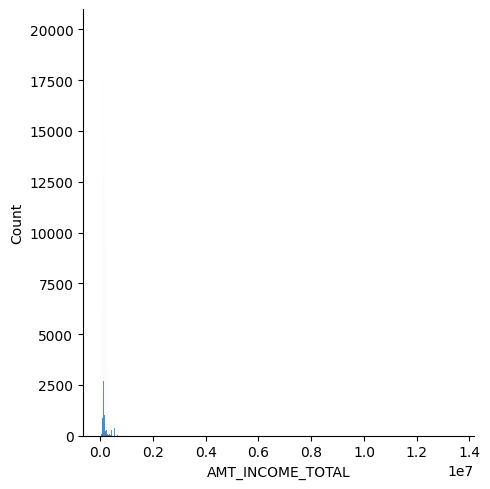

In [ ]:
# AMT_INCOME_TOTALの分布
sns.displot(data=train, x="AMT_INCOME_TOTAL")
plt.show()

AMT_INCOME_TOTALは、通常通り可視化してもうまくグラフが表示されていません。このような場合には、大きな数値を取る少数の外れ値が存在することが原因であると考えられます。今回のようなデータを可視化したい場合は、対数変換を行うと上手くグラフを表示することができます。

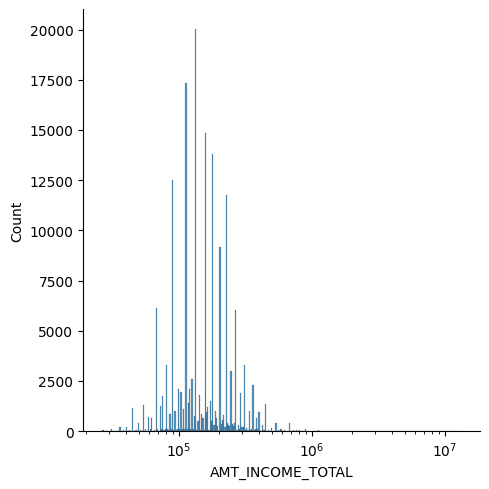

In [ ]:
# AMT_INCOME_TOTALの分布（対数変換）
sns.displot(data=train, x="AMT_INCOME_TOTAL", log_scale=10)
plt.show()

対数変換してグラフを描画することで、うまく表示することができました。しかし、年収というのは本来連続的な値を取るはずなのに、グラフをみると離散的な値をとっているようです。AMT_INCOME_TOTALの値の種類を確認してみましょう。

In [ ]:
# AMT_INCOME_TOTALの値の種類を確認
len(train["AMT_INCOME_TOTAL"].unique())

1641

trainには171202個のデータが存在するのですが、AMT_INCOME_TOTALは1641種類の値のみで構成されています。具体的に上位10個の値を確認してみましょう。

In [ ]:
# AMT_INCOME_TOTALの上位10個
train["AMT_INCOME_TOTAL"].value_counts().head(10)

,count
AMT_INCOME_TOTAL,
135000.0,19969
112500.0,17320
157500.0,14772
180000.0,13791
90000.0,12481
225000.0,11573
202500.0,9128
67500.0,6130
270000.0,6006


どうやらAMT_INCOME_TOTALは正確な年収ではなく、きりの良い数字で集計されたデータであることが分かりました。

### NAME_CONTRACT_TYPEの前処理




In [ ]:
print(train['NAME_INCOME_TYPE'].isnull().sum())
print(test['NAME_INCOME_TYPE'].isnull().sum())


0
0


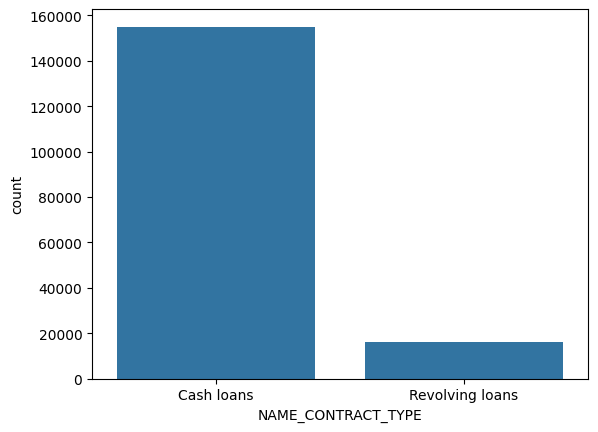

In [ ]:
# NAME_CONTRACT_TYPEの分布
sns.countplot(data=train, x="NAME_CONTRACT_TYPE")
plt.show()

NAME_CONTRACT_TYPEには、Cash loansとRevolving loansという2種類の変数が存在しますが、大きく偏りがあることが分かります。また、機械学習モデルでは数値型のデータしか扱えないため、文字列型から数値型に変換する必要があります。

NAME_CONTRACT_TYPEを数値型に変換します。今回は、「Cash loans」を0に「Revolving loans」を1に変換します。このように、単純に整数に置き換える手法をLabel Encodingと呼びます。

In [ ]:
# NAME_CONTRACT_TYPEの数値化（Label Encoding）
train["NAME_CONTRACT_TYPE"].replace({'Cash loans': 0, 'Revolving loans': 1}, inplace=True)
test["NAME_CONTRACT_TYPE"].replace({'Cash loans': 0, 'Revolving loans': 1}, inplace=True)

train.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,EXT_SOURCE_MEAN,OCCUPATION_TYPE_MISSING
0,0,0,0,F,N,N,0,112500.0,755190.0,36328.5,...,0.0,0.0,0.0,-292.0,NaN,NaN,NaN,NaN,0.372591,0
1,1,0,0,F,N,Y,0,225000.0,585000.0,16893.0,...,0.0,0.0,0.0,-617.0,0.0,0.0,0.0,1.0,0.501366,1
2,2,0,0,F,N,Y,0,54000.0,334152.0,18256.5,...,0.0,4.0,0.0,-542.0,NaN,NaN,NaN,NaN,0.569503,0
3,3,0,0,F,N,Y,0,67500.0,152820.0,8901.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.436379,1
4,4,1,0,M,N,N,0,157500.0,271066.5,21546.0,...,0.0,0.0,0.0,-1243.0,0.0,0.0,0.0,4.0,0.404630,0


###ORGANIZATION_TYPEの前処理

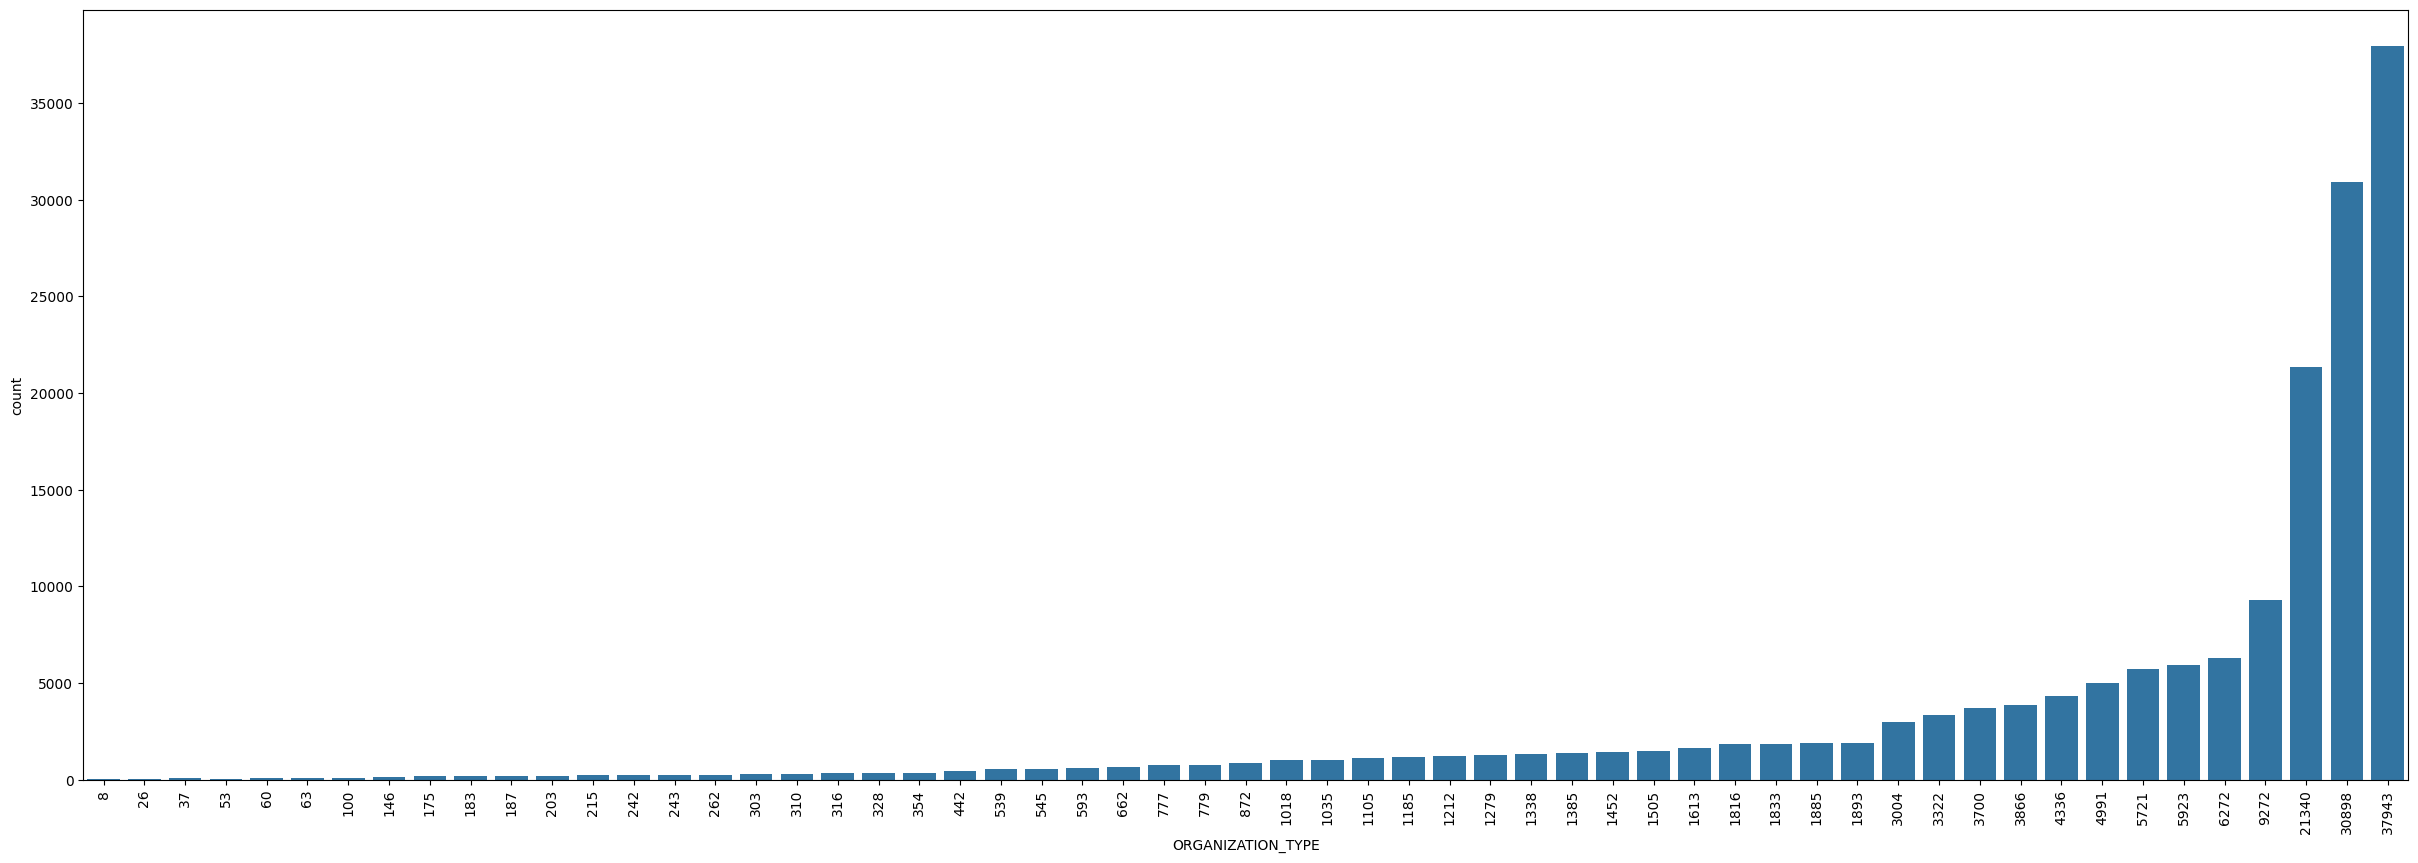

In [ ]:
# ORGANIZATION_TYPEの分布
plt.figure(figsize=(30, 10))
sns.countplot(data=train, x="ORGANIZATION_TYPE")
plt.tick_params(axis="x", rotation=90)
plt.show()

ORGANIZATION_TYPEを数値型に変換します。今回は、変数のデータ数で数値化します。例えば、「Police」のデータ数が1279、「Bank」のデータ数が1385である場合には、「Police」を1279に、「Bank」を1385に変換します。このようにデータ数に置き換える手法をCount Encodingと呼びます。

In [ ]:
# ORGANIZATION_TYPEの数値化（Count Encoding）
organization_ce = train["ORGANIZATION_TYPE"].value_counts()
train["ORGANIZATION_TYPE"] = train["ORGANIZATION_TYPE"].map(organization_ce)
test["ORGANIZATION_TYPE"] = test["ORGANIZATION_TYPE"].map(organization_ce)

train.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,EXT_SOURCE_MEAN,OCCUPATION_TYPE_MISSING
0,0,0,0,F,N,N,0,112500.0,755190.0,36328.5,...,0.0,0.0,0.0,-292.0,NaN,NaN,NaN,NaN,0.372591,0
1,1,0,0,F,N,Y,0,225000.0,585000.0,16893.0,...,0.0,0.0,0.0,-617.0,0.0,0.0,0.0,1.0,0.501366,1
2,2,0,0,F,N,Y,0,54000.0,334152.0,18256.5,...,0.0,4.0,0.0,-542.0,NaN,NaN,NaN,NaN,0.569503,0
3,3,0,0,F,N,Y,0,67500.0,152820.0,8901.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.436379,1
4,4,1,0,M,N,N,0,157500.0,271066.5,21546.0,...,0.0,0.0,0.0,-1243.0,0.0,0.0,0.0,4.0,0.404630,0


###CODE_GENDERの前処理

In [100]:
train['CODE_GENDER'].isnull().sum()
test['CODE_GENDER'].isnull().sum()

0

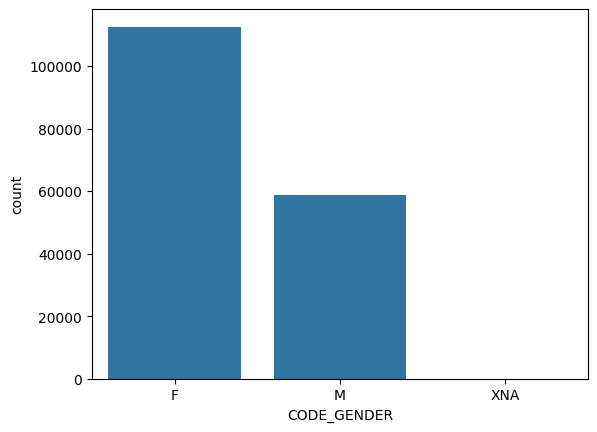

In [ ]:
# NAME_CONTRACT_TYPEの分布
sns.countplot(data=train, x="CODE_GENDER")
plt.show()

In [ ]:
train["CODE_GENDER"].value_counts()


,count
CODE_GENDER,
F,112549
M,58649
XNA,4


最頻値のFに合わせる

In [ ]:
train["CODE_GENDER"].replace({'F': 0, 'M': 1, 'XNA': 0}, inplace=True)
test["CODE_GENDER"].replace({'F': 0, 'M': 1, 'XNA': 0}, inplace=True)

###CNT_CHILDRENの前処理



In [101]:
train['CNT_CHILDREN'].isnull().sum()
test['CNT_CHILDREN'].isnull().sum()

0

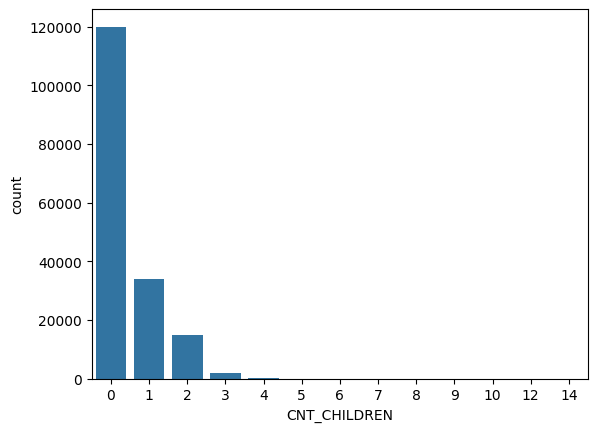

In [79]:

sns.countplot(data=train, x="CNT_CHILDREN")
plt.show()

欠損値もなさそうだし、そのまま使うか

###AMT_CREDITの前処理



In [104]:
print(train['AMT_CREDIT'].isnull().sum())
print(test['AMT_CREDIT'].isnull().sum())

0
0


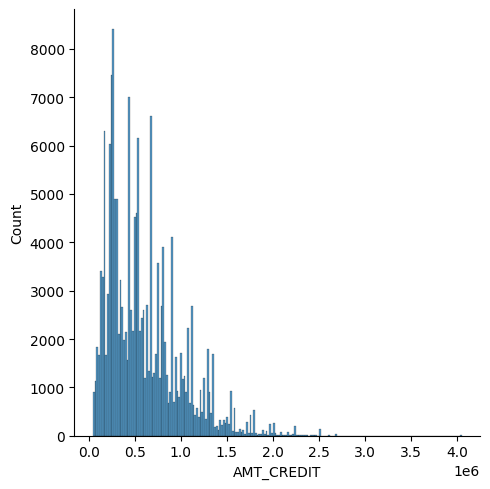

In [107]:
sns.displot(data=train, x="AMT_CREDIT")
plt.show()

In [109]:
train["AMT_CREDIT_LOG"] = np.log1p(train["AMT_CREDIT"])
test["AMT_CREDIT_LOG"] = np.log1p(test["AMT_CREDIT"])

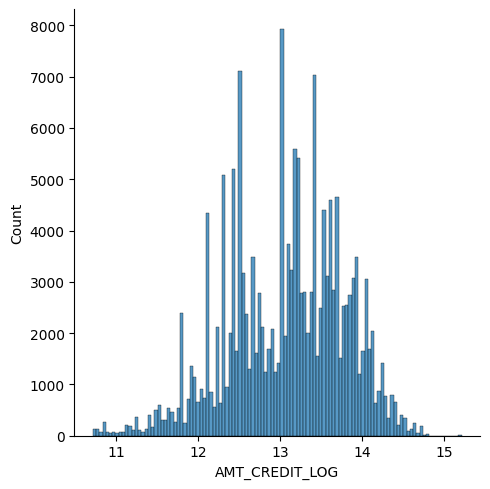

In [108]:
sns.displot(data=train, x="AMT_CREDIT_LOG")
plt.show()

モデルでlogと比較してみたけど、どっちも同じ結果だった
無難にlogを残しておくか

###AMT_ANNUITYの前処理

In [130]:
print(train['AMT_ANNUITY'].isnull().sum())
print(test['AMT_ANNUITY'].isnull().sum())

0
0


In [118]:
train['AMT_ANNUITY'].describe()

,AMT_ANNUITY
count,171196.000000
mean,27127.500701
std,14538.361801
min,1980.000000
25%,16546.500000
50%,24916.500000
75%,34600.500000
max,258025.500000


In [133]:
#最頻値でカバー
median_val = train['AMT_ANNUITY'].median()
train['AMT_ANNUITY'].fillna(median_val, inplace=True)
test['AMT_ANNUITY'].fillna(median_val, inplace=True)


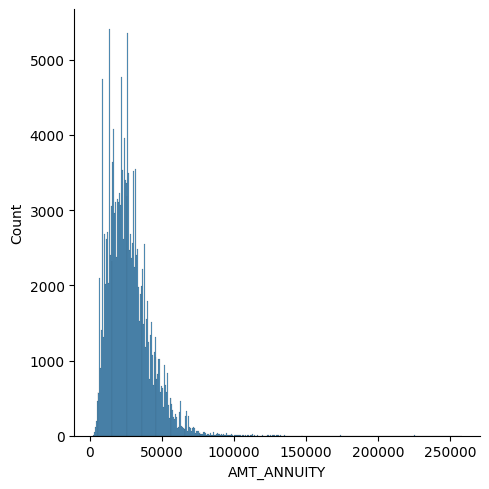

In [115]:
sns.displot(data=train, x="AMT_ANNUITY")
plt.show()

In [134]:

train["AMT_ANNUITY_LOG"] = np.log1p(train["AMT_ANNUITY"])
test["AMT_ANNUITY_LOG"] = np.log1p(test["AMT_ANNUITY"])

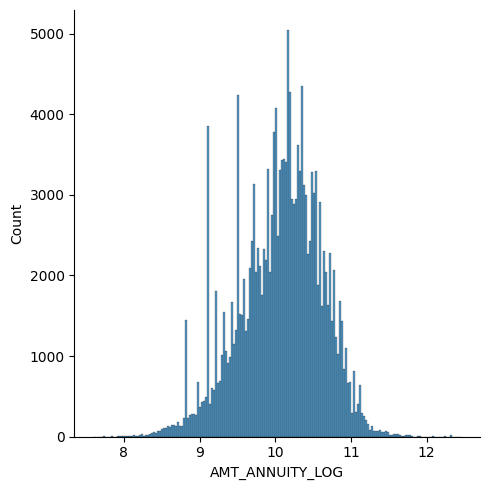

In [120]:
sns.displot(data=train, x="AMT_ANNUITY_LOG")
plt.show()

,AMT_ANNUITY_LOG
count,171196.000000
mean,10.068188
std,0.546095
min,7.591357
25%,9.713990
50%,10.123326
75%,10.451652
max,12.460818


###NAME_INCOME_TYPEの前処理

In [137]:
print(train['NAME_INCOME_TYPE'].isnull().sum())
print(test['NAME_INCOME_TYPE'].isnull().sum())

0
0


In [140]:
train['NAME_INCOME_TYPE'].value_counts()
test['NAME_INCOME_TYPE'].value_counts()

,count
NAME_INCOME_TYPE,
Working,32460
Commercial associate,14253
Pensioner,10560
State servant,4215
Unemployed,6
Student,4
Maternity leave,1
Businessman,1


In [141]:
test['NAME_INCOME_TYPE'].value_counts()

,count
NAME_INCOME_TYPE,
Working,32460
Commercial associate,14253
Pensioner,10560
State servant,4215
Unemployed,6
Student,4
Maternity leave,1
Businessman,1


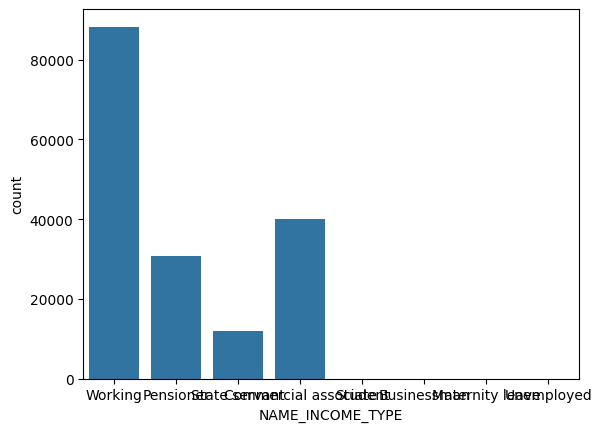

In [138]:
sns.countplot(data=train, x="NAME_INCOME_TYPE")
plt.show()

In [151]:
freq = train['NAME_INCOME_TYPE'].value_counts()
train['NAME_INCOME_TYPE_FE'] = train['NAME_INCOME_TYPE'].map(freq)

評価が下がるのでdropする

###NAME_EDUCATION_TYPEの前処理

In [156]:
print(train['NAME_EDUCATION_TYPE'].isnull().sum())
print(test['NAME_EDUCATION_TYPE'].isnull().sum())

0
0


In [157]:
train['NAME_EDUCATION_TYPE'].value_counts()

,count
NAME_EDUCATION_TYPE,
Secondary / secondary special,121612
Higher education,41645
Incomplete higher,5711
Lower secondary,2133
Academic degree,101


In [159]:
# 学習データのエンコード
train_dummies_NAME_EDUCATION_TYPE = pd.get_dummies(train['NAME_EDUCATION_TYPE'], prefix='income_type').astype(int)

# テストデータのエンコード
test_dummies_NAME_EDUCATION_TYPE = pd.get_dummies(test['NAME_EDUCATION_TYPE'], prefix='income_type').astype(int)

In [160]:
train_dummies_NAME_EDUCATION_TYPE.head()

,income_type_Academic degree,income_type_Higher education,income_type_Incomplete higher,income_type_Lower secondary,income_type_Secondary / secondary special
0,0,1,0,0,0
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,0,1,0
4,0,0,0,0,1


###モデル

In [86]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss

from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

In [163]:
# 特徴量とターゲットの分割
X = pd.concat([train[['EXT_SOURCE_MEAN','OCCUPATION_TYPE_MISSING', 'AMT_INCOME_TOTAL',
                      'NAME_CONTRACT_TYPE', 'ORGANIZATION_TYPE', 'CODE_GENDER',
                      'CNT_CHILDREN', 'AMT_CREDIT_LOG', 'AMT_ANNUITY_LOG']],
               train_dummies_NAME_EDUCATION_TYPE], axis=1)

In [162]:
y = train['TARGET']

# 学習データと検証データの分割（stratifyオプションでラベル分布を維持）
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# LightGBMのデータセット作成
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_valid, y_valid, reference=lgb_train)

# LightGBMのパラメータ (一例)
params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'boosting_type': 'gbdt',
    'seed': 42,
    'verbose': -1,
    'learning_rate': 0.05,
    'num_leaves': 31,
    'feature_fraction': 0.8,
    'bagging_fraction': 0.8,
    'bagging_freq': 1
}

# コールバックを利用した早期終了と評価ログ出力
callbacks = [
    lgb.early_stopping(stopping_rounds=20),
    lgb.log_evaluation(period=50)
]

# モデルの学習
model = lgb.train(
    params,
    lgb_train,
    num_boost_round=1000,
    valid_sets=[lgb_eval],
    valid_names=['valid'],
    callbacks=callbacks
)

# 検証データで評価
y_pred = model.predict(X_valid, num_iteration=model.best_iteration)


# 学習済みモデルに対して予測
y_train_pred = model.predict(X_train, num_iteration=model.best_iteration)
y_valid_pred = model.predict(X_valid, num_iteration=model.best_iteration)

# 評価指標の計算
val_logloss = log_loss(y_valid, y_valid_pred)
train_auc = roc_auc_score(y_train, y_train_pred)
valid_auc = roc_auc_score(y_valid, y_valid_pred)

#
print("Validation Log Loss:", val_logloss)
print("Train Score:", train_auc)
print("Valid Score:", valid_auc)

Training until validation scores don't improve for 20 rounds
[50]	valid's binary_logloss: 0.256645
[100]	valid's binary_logloss: 0.255388
[150]	valid's binary_logloss: 0.255028
Early stopping, best iteration is:
[165]	valid's binary_logloss: 0.254964
Validation Log Loss: 0.25496366297988865
Train Score: 0.7736467639388189
Valid Score: 0.7249265215908688


In [ ]:
# 例:
X_test = test[['EXT_SOURCE_MEAN', 'OCCUPATION_TYPE_MISSING', 'AMT_INCOME_TOTAL', 'NAME_CONTRACT_TYPE', 'ORGANIZATION_TYPE']]

# テストデータに対する予測
pred = model.predict(X_test)

# 予測結果を提出用DataFrameに格納
sample_sub['TARGET'] = pred

# 提出用のcsvファイルを作成
sample_sub.to_csv('submission.csv', index=False)
print("submission.csv が作成されました")

submission.csv が作成されました
